In [1]:
%matplotlib inline

In [2]:
!git clone https://github.com/marco-c/crashcorrelations

Cloning into 'crashcorrelations'...
remote: Counting objects: 88, done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 88 (delta 50), reused 67 (delta 29), pack-reused 0
Unpacking objects: 100% (88/88), done.
Checking connectivity... done.


In [3]:
from crashcorrelations import download_data
from crashcorrelations import crash_deviations
from crashcorrelations import plot

download_data.set_token('YOUR_SOCORRO_TOKEN_HERE')

In [4]:
df_a = download_data.get_crashes(sc, version='47.0', days=2)
df_b = df_a.filter(df_a['signature'].startswith('npmcffplg32.dll'))

{'product': 'Firefox', '_columns': ['signature', 'build_id', 'platform', 'platform_pretty_version', 'adapter_vendor_id', 'adapter_device_id', 'adapter_driver_version', 'plugin_version', 'url', 'available_virtual_memory', 'available_physical_memory', 'total_virtual_memory', 'total_physical_memory', 'oom_allocation_size', 'uptime', 'number_of_processors', 'jit_category', 'is_garbage_collecting', 'dom_ipc_enabled', 'cpu_arch', 'cpu_name', 'cpu_info', 'bios_manufacturer', 'app_notes', 'addons'], '_results_number': 1000, 'version': '47.0', '_results_offset': 26301, 'date': ['>=2016-07-14', '<2016-07-15']}
{'product': 'Firefox', '_columns': ['signature', 'build_id', 'platform', 'platform_pretty_version', 'adapter_vendor_id', 'adapter_device_id', 'adapter_driver_version', 'plugin_version', 'url', 'available_virtual_memory', 'available_physical_memory', 'total_virtual_memory', 'total_physical_memory', 'oom_allocation_size', 'uptime', 'number_of_processors', 'jit_category', 'is_garbage_collecti

449
[u'{972ce4c6-7e08-4474-a285-3208198ce6fd}', u'firefox@getpocket.com', u'e10srollout@mozilla.org', u'loop@mozilla.org', u'{4ED1F68A-5463-4931-9384-8FFF5ED91D92}', u'langpack-en-US@firefox.mozilla.org', u'{82AF8DCA-6DE9-405D-BD5E-43525BDAD38A}', u'abb@amazon.com', u'jetpack-extension@dashlane.com', u'light_plugin_D772DC8D6FAF43A29B25C4EBAA5AD1DE@kaspersky.com', u'homeutil@yandex.ru', u'webrootsecure@webroot.com', u'{8ac62a8b-8b3f-43ba-9b1a-90c299b9dfda}', u'web2pdfextension.15@web2pdf.adobedotcom', u'_39Members_@www.mapsgalaxy.com', u'{C1A2A613-35F1-4FCF-B27F-2840527B6556}', u'{cb40da56-497a-4add-955d-3377cae4c33b}', u'shopcbtoolbar2@befrugal.com', u'uBlock0@raymondhill.net', u'{d10d0bf8-f5b5-c8b4-a8b2-2b9879e08c5d}', u'{6E727987-C8EA-44DA-8749-310C0FBE3C3E}', u'client@anonymox.net', u'{7affbfae-c4e2-4915-8c0f-00fa3ec610a1}', u'fxdevtools-adapters@mozilla.org', u'adbhelper@mozilla.org']
root
 |-- adapter_device_id: string (nullable = true)
 |-- adapter_driver_version: string (nullabl

/home/hadoop/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


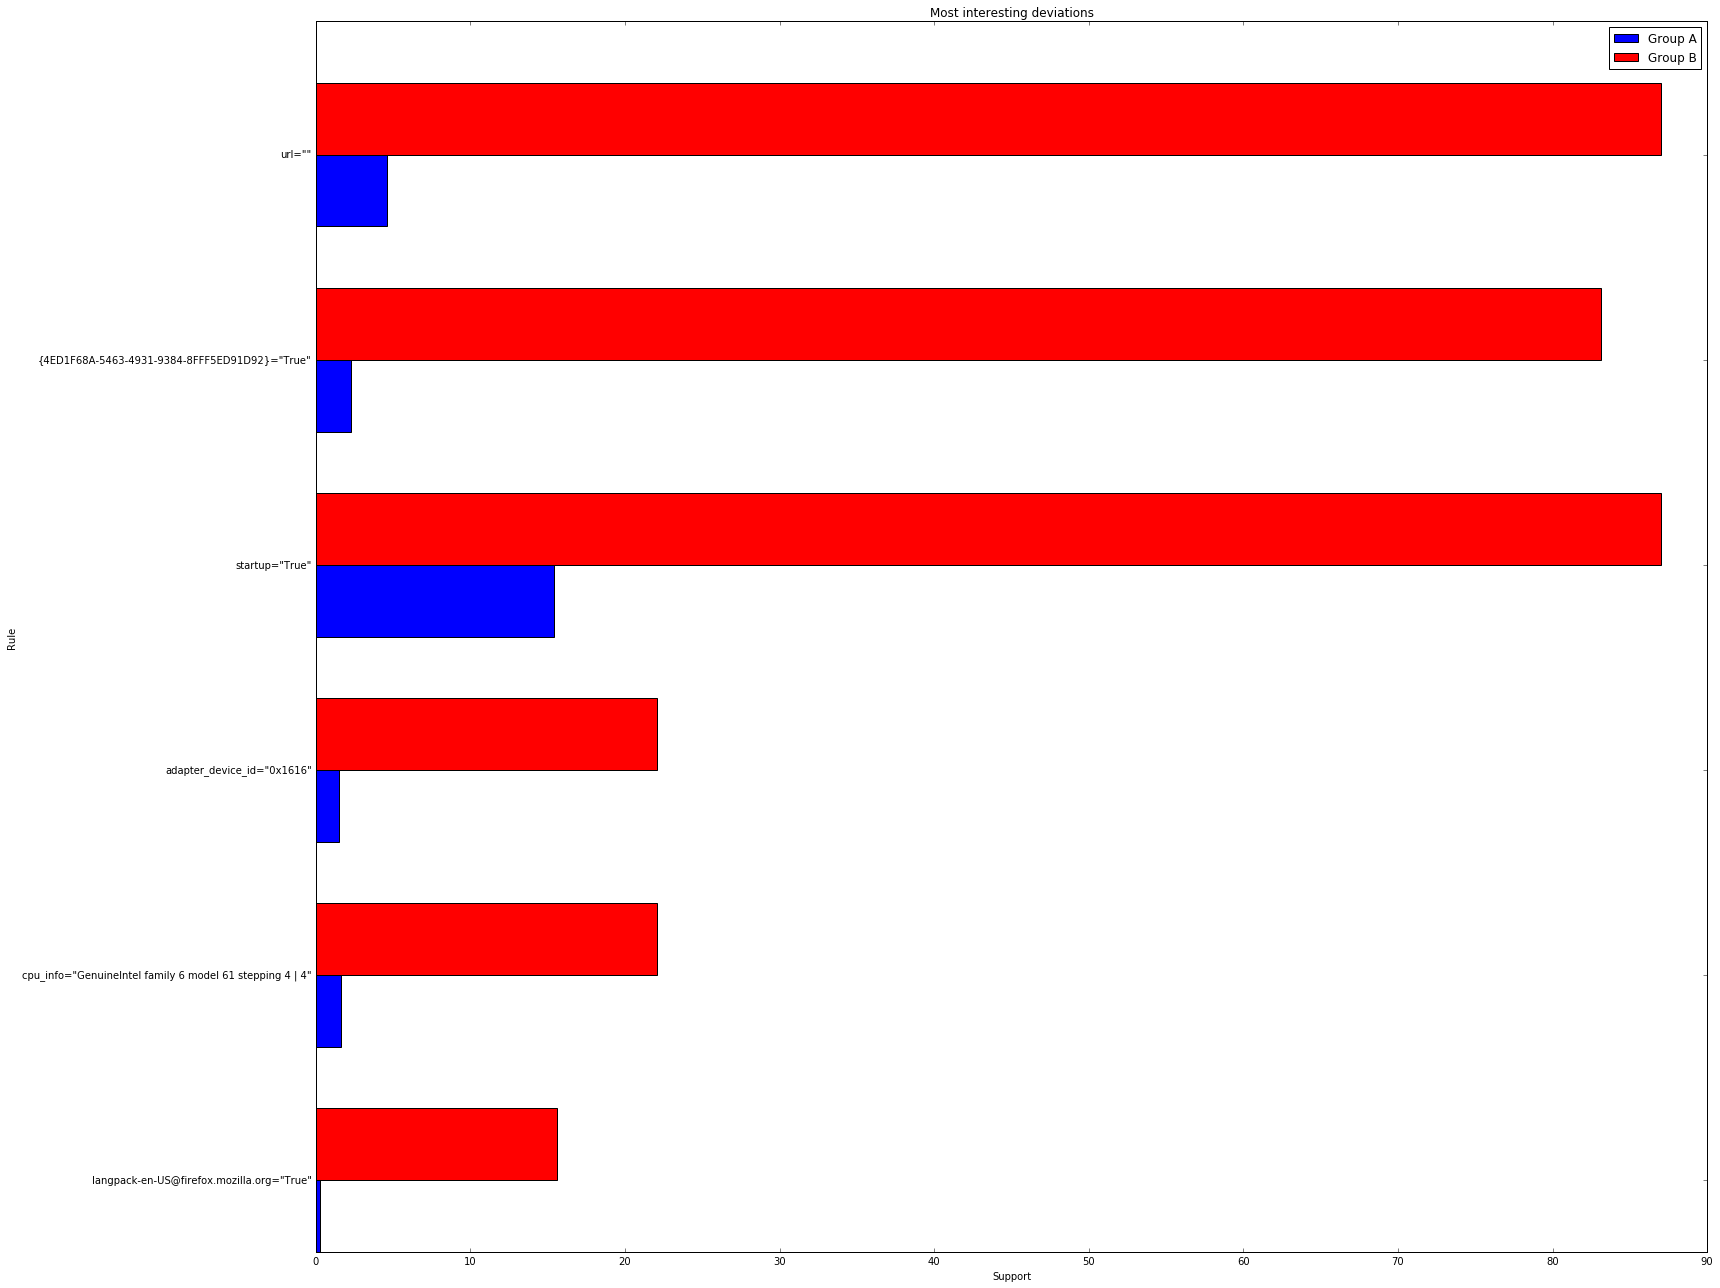

In [5]:
results = crash_deviations.find_deviations(sc, df_a, df_b, min_support_diff=0.15, min_corr=0.03, max_addons=50)
plot.plot(results)